In [21]:
 import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import math
import yaml
from torch.utils.data.dataloader import DataLoader
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
from itertools import combinations

In [3]:
ROOT = 'C:\\Users\\curea\\Documents\\bioFM for drug discovery\\dege-fm\\'

adata = ad.read_h5ad(ROOT + "data\\sciplex\\sciplex_preprocessed.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 571906 × 1280
    obs: 'index', 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'label', 'pubchem_name', 'pubchem_ID', 'smiles', 'sm_embedding'

In [11]:
results = dict()

for drug in tqdm(list(adata.obs['product_name'].unique())):
    for cell_type in list(adata.obs['cell_type'].unique()):
        for dose in list(adata.obs['dose'].unique()):

            adata_subset = adata[adata.obs['cell_type'] == cell_type]
            adata_subset = adata_subset[adata_subset.obs['product_name'] == drug]
            adata_subset = adata_subset[adata_subset.obs['dose'] == dose]

            #print(drug, cell_type, dose, adata_subset.n_obs)

            if adata_subset.n_obs == 0:
                continue

            centroid = np.mean(adata_subset.X, axis=0)

            key = drug + "_" + cell_type + "_" + str(dose)

            results[key] = centroid

100%|██████████| 186/186 [05:14<00:00,  1.69s/it]


In [22]:
all_dist = list()

for x, y in tqdm(combinations(results.keys(), 2)):
    dist = euclidean(results[x], results[y])
    all_dist.append(dist)





2469753it [00:12, 199631.85it/s]


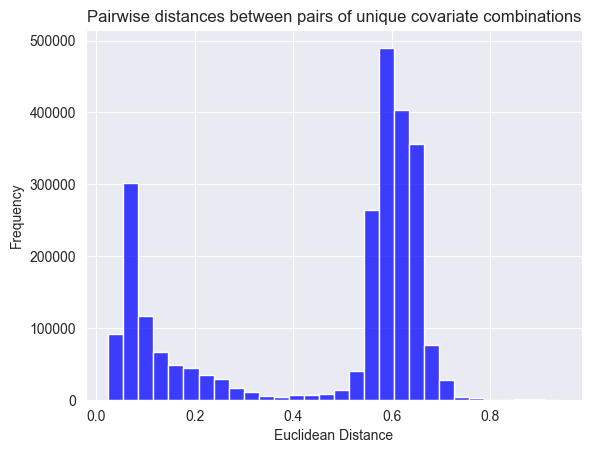

In [24]:
# Using seaborn for a styled histplot
sns.histplot(all_dist, bins=30, kde=False, color="blue")  # kde=True adds a Kernel Density
plt.title("Pairwise distances between pairs of unique covariate combinations")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.show()

In [34]:
same_cell_dist = list()

for x, y in tqdm(combinations(results.keys(), 2)):

    if x.split("_")[1] == y.split("_")[1]:

        dist = euclidean(results[x], results[y])
        #dist = np.mean((results[x] - results[y])**2)
        same_cell_dist.append(dist)

2469753it [00:05, 470246.19it/s]


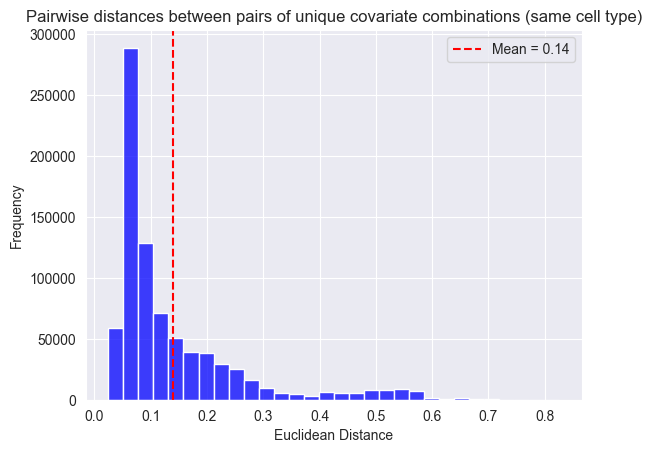

In [35]:
# Using seaborn for a styled histplot
sns.histplot(same_cell_dist, bins=30, kde=False, color="blue")  # kde=True adds a Kernel Density
plt.title("Pairwise distances between pairs of unique covariate combinations (same cell type)")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
# Calculate the mean value
mean_value = np.mean(same_cell_dist)

# Plot the mean value as a vertical line
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean = {mean_value:.2f}')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [28]:
same_cell_same_drug_dist = list()

for x, y in tqdm(combinations(results.keys(), 2)):

    if x.split("_")[1] == y.split("_")[1]:
        if x.split("_")[0] == y.split("_")[0]:
            dist = euclidean(results[x], results[y])
            same_cell_same_drug_dist.append(dist)

2469753it [00:01, 1646322.23it/s]


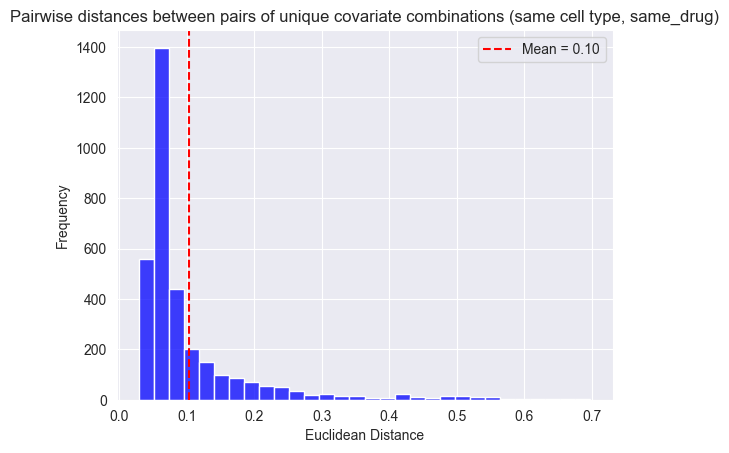

In [30]:
# Using seaborn for a styled histplot
sns.histplot(same_cell_same_drug_dist, bins=30, kde=False, color="blue")  # kde=True adds a Kernel Density
plt.title("Pairwise distances between pairs of unique covariate combinations (same cell type, same_drug)")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
# Calculate the mean value
mean_value = np.mean(same_cell_same_drug_dist)

# Plot the mean value as a vertical line
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean = {mean_value:.2f}')

# Display the legend
plt.legend()

# Show the plot
plt.show()